In [1]:
from skimage import color,io,filters,morphology,util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np

# Soal 1

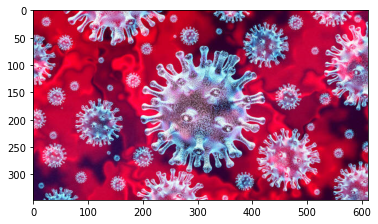

In [2]:
i1 = io.imread('virus.jpg')
plt.imshow(i1)
plt.show()

### a. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing terhadap hasilnya dengan kernel 4x4


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


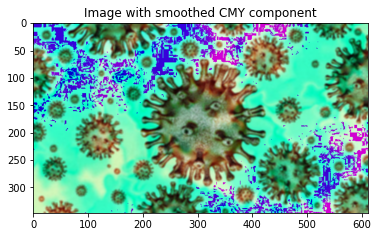

In [3]:
C = 1 - util.img_as_float(i1[:,:,0])
M = 1 - util.img_as_float(i1[:,:,1])
Y = 1 - util.img_as_float(i1[:,:,2])

C_smooth = filters.rank.mean(C,selem=morphology.square(4))
CMY_C = util.img_as_ubyte(np.zeros(i1.shape))
CMY_C[:,:,0] = C_smooth; CMY_C[:,:,1] = M; CMY_C[:,:,2] = Y;

M_smooth = filters.rank.mean(M,selem=morphology.square(4))
CMY_M = util.img_as_ubyte(np.zeros(i1.shape))
CMY_M[:,:,0] = C; CMY_M[:,:,1] = M_smooth; CMY_M[:,:,2] = Y;

Y_smooth = filters.rank.mean(Y,selem=morphology.square(4))
CMY_Y = util.img_as_ubyte(np.zeros(i1.shape))
CMY_Y[:,:,0] = C; CMY_Y[:,:,1] = M; CMY_Y[:,:,2] = Y_smooth;

CMY_4 = util.img_as_ubyte(np.zeros(i1.shape))

CMY_4= CMY_C + CMY_M +CMY_Y


plt.imshow(CMY_4, cmap='gray')
plt.title('Image with smoothed CMY component');
plt.show()

### b. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing terhadap hasilnya dengan kernel 9x9


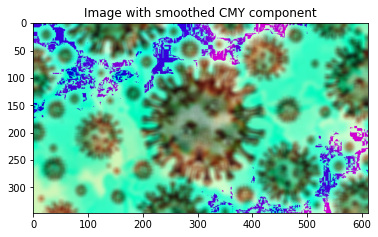

In [4]:
C_smooth = filters.rank.mean(C,selem=morphology.square(9))
CMY_C = util.img_as_ubyte(np.zeros(i1.shape))
CMY_C[:,:,0] = C_smooth; CMY_C[:,:,1] = M; CMY_C[:,:,2] = Y;

M_smooth = filters.rank.mean(M,selem=morphology.square(9))
CMY_M = util.img_as_ubyte(np.zeros(i1.shape))
CMY_M[:,:,0] = C; CMY_M[:,:,1] = M_smooth; CMY_M[:,:,2] = Y;

Y_smooth = filters.rank.mean(Y,selem=morphology.square(9))
CMY_Y = util.img_as_ubyte(np.zeros(i1.shape))
CMY_Y[:,:,0] = C; CMY_Y[:,:,1] = M; CMY_Y[:,:,2] = Y_smooth;

CMY_9 = util.img_as_ubyte(np.zeros(i1.shape))

CMY_9= CMY_C + CMY_M +CMY_Y

plt.imshow(CMY_9, cmap='gray')
plt.title('Image with smoothed CMY component');
plt.show()

### c. Bandingkan hasil citra pada poin a dan b

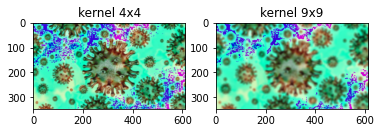

In [5]:
plt.subplot(1,2,1);plt.imshow(CMY_4, cmap='gray')
plt.title('kernel 4x4');
plt.subplot(1,2,2);plt.imshow(CMY_9, cmap='gray')
plt.title('kernel 9x9');
plt.show()

> Dari hasil diatas dapat terlihat bahwa hasil citra pada poin a jauh lebih jelas dibandingkan citra b

### d. Lakukan clustering menggunakan metode k-mean clustering dengan k = 4


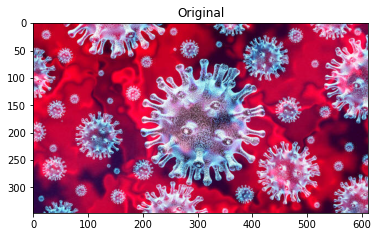

In [6]:
import cv2
i1 = cv2.imread("virus.jpg")
i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)

plt.imshow(i1)
plt.title("Original")
plt.show()

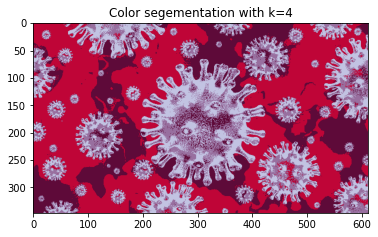

In [7]:
pixel_values = i1.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4

_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()
segmented_image = centers[labels.flatten()]

segmented_image_4 = segmented_image.reshape(i1.shape)

plt.imshow(segmented_image_4)
plt.title("Color segementation with k=4")
plt.show()

### e. Lakukan clustering menggunakan metode k-mean clustering dengan k = 9  

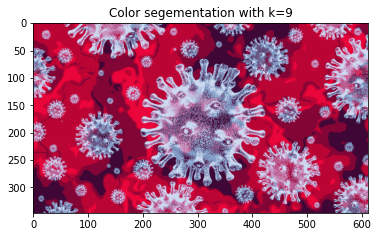

In [8]:
pixel_values = i1.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 9

_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()
segmented_image = centers[labels.flatten()]

segmented_image_9 = segmented_image.reshape(i1.shape)

plt.imshow(segmented_image_9)
plt.title("Color segementation with k=9")
plt.show()

### f. Ceritakan perbedaan yang kamu dapatkan pada poin d dan e, serta jelaskan mengapa perbedaan tersebut bisa terjadi

> Dari hasil perbandingan diatas, terlihat bahwa hasil citra dengan menggunakan k=9 lebih medekati hasil citra original dibandingkan dengan menggunakan k = 4. Metode K-Means mempartisi N piksel ke dalam K cluster. Cluster sendiri merupakan
dapat dianggap sebagai himpunan yang terdiri dari piksel yang memiliki similaritas (warna) yang mirip. Semakin dikit cluster maka himpunan yang terdiri dari piksel yang memiliki similaritas (warna) yang mirip semakin sedikit sehingga dapat membuat beberapa himpunan warna dianggap sama. Berbeda halnya dengan k=9 yang membuat beberapa himpunan yang terdiri dari piksel yang memiliki similaritas (warna) yang mirip lebih banyak dibandingkan k=4 sehinggga hasil citra yang dihasilkan lebih menunjukan perbedaan dari beberapa himpunan warna.

# Soal 2

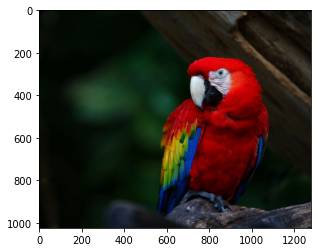

In [9]:
i2 = io.imread('bird.jpg')
plt.imshow(i2)
plt.show()

R = i2[:,:,0]
G = i2[:,:,1]
B = i2[:,:,2]

### a. Terapkan sharpening pada gambar tersebut untuk ketiga channel R, G, dan B.

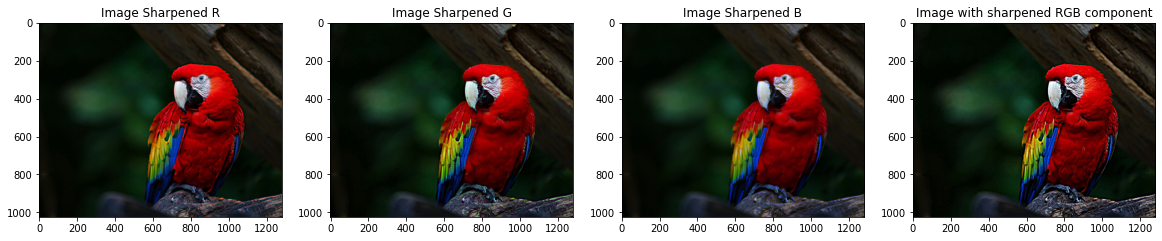

In [10]:
R2 = util.img_as_ubyte(filters.unsharp_mask(R,radius=5,amount=2))
RGB_R = util.img_as_ubyte(np.zeros(i2.shape))
RGB_R[:,:,0] = R2; RGB_R[:,:,1] = G; RGB_R[:,:,2] = B

G2 = util.img_as_ubyte(filters.unsharp_mask(G,radius=5,amount=2))
RGB_G = util.img_as_ubyte(np.zeros(i2.shape))
RGB_G[:,:,0] = R; RGB_G[:,:,1] = G2; RGB_G[:,:,2] = B

B2 = util.img_as_ubyte(filters.unsharp_mask(B,radius=5,amount=2))
RGB_B = util.img_as_ubyte(np.zeros(i2.shape))
RGB_B[:,:,0] = R; RGB_B[:,:,1] = G; RGB_B[:,:,2] = B2

RGB_sharp = util.img_as_ubyte(np.zeros(i2.shape))
RGB_sharp[:,:,0] = R2;
RGB_sharp[:,:,1] = G2;
RGB_sharp[:,:,2] = B2;

plt.figure(figsize=(20,5))
plt.subplot(1,4,1);plt.imshow(RGB_R);plt.title('Image Sharpened R');
plt.subplot(1,4,2);plt.imshow(RGB_G);plt.title('Image Sharpened G');
plt.subplot(1,4,3);plt.imshow(RGB_B);plt.title('Image Sharpened B');
plt.subplot(1,4,4);plt.imshow(RGB_sharp);plt.title('Image with sharpened RGB component');


plt.show()

### b. Terapkan contrast stretching terhadap ketiga channel R, G dan B lalu tampilkan hasilnya sebagai satu citra!

In [11]:
mn = min(R.flatten())
mx = max(R.flatten())
b = int(np.floor(255 / (mx - mn)))
R_cs = (R - mn) * b

mn = min(G.flatten())
mx = max(G.flatten())
b = int(np.floor(255 / (mx - mn)))
G_cs = (G - mn) * b


mn = min(B.flatten())
mx = max(B.flatten())
b = int(np.floor(255 / (mx - mn)))
B_cs = (B - mn) * b

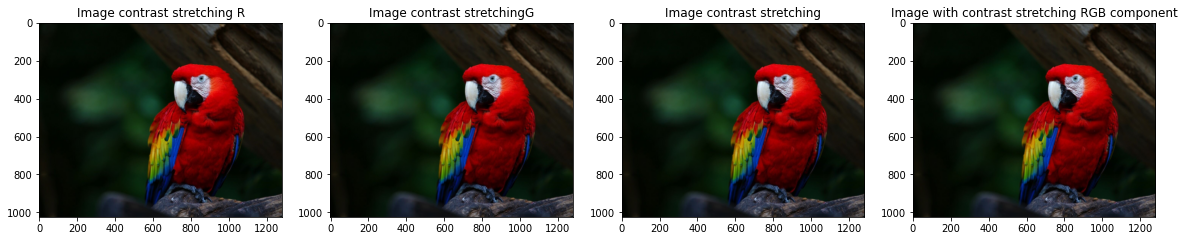

In [12]:
RGB_R_cs = util.img_as_ubyte(np.zeros(i2.shape))
RGB_R_cs[:,:,0] = R_cs; RGB_R_cs[:,:,1] = G; RGB_R_cs[:,:,2] = B

RGB_G_cs = util.img_as_ubyte(np.zeros(i2.shape))
RGB_G_cs[:,:,0] = R; RGB_G_cs[:,:,1] = G_cs; RGB_G_cs[:,:,2] = B

RGB_B_cs = util.img_as_ubyte(np.zeros(i2.shape))
RGB_B_cs[:,:,0] = R; RGB_B_cs[:,:,1] = G; RGB_B_cs[:,:,2] = B_cs

RGB_cs = util.img_as_ubyte(np.zeros(i2.shape))
RGB_cs[:,:,0] = R_cs;
RGB_cs[:,:,1] = G_cs;
RGB_cs[:,:,2] = B_cs;
 
plt.figure(figsize=(20,5))
plt.subplot(1,4,1);plt.imshow(RGB_R_cs);plt.title('Image contrast stretching R');
plt.subplot(1,4,2);plt.imshow(RGB_G_cs);plt.title('Image contrast stretchingG');
plt.subplot(1,4,3);plt.imshow(RGB_B_cs);plt.title('Image contrast stretching');
plt.subplot(1,4,4);plt.imshow(RGB_cs);plt.title('Image with contrast stretching RGB component');
plt.show()

###  c. Lakukan konversi gambar bird.jpg tersebut menjadi bentuk citra HSV! Terapkan sharpening pada gambar tersebut pada channel V. Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.

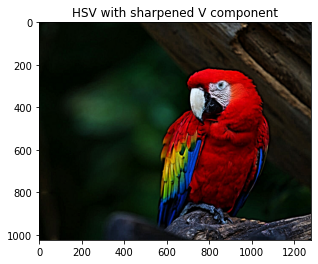

In [13]:
HSV = cv2.cvtColor(i2,cv2.COLOR_RGB2HSV)
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

HSV_sharp = util.img_as_ubyte(np.zeros(i2.shape))
HSV_sharp[:,:,0] = H; 
HSV_sharp[:,:,1] = S; 
HSV_sharp[:,:,2] = util.img_as_ubyte(filters.unsharp_mask(V,radius=5,amount=2));


HSV_sharp = cv2.cvtColor(HSV_sharp,cv2.COLOR_HSV2RGB)
plt.imshow(HSV_sharp); 
plt.title('HSV with sharpened V component');
plt.show()

###  d. Terapkan contrast stretching terhadap channel V lalu tampilkan hasilnya sebagai satu citra! Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.

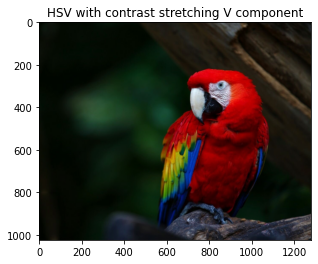

In [14]:
HSV = cv2.cvtColor(i2,cv2.COLOR_RGB2HSV)
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

mn = min(V.flatten())
mx = max(V.flatten())
b = int(np.floor(255 / (mx - mn)))
V_cs = (V - mn) * b


HSV_cs = util.img_as_ubyte(np.zeros(i2.shape))
HSV_cs[:,:,0] = H; 
HSV_cs[:,:,1] = S; 
HSV_cs[:,:,2] = V_cs;

HSV_cs = cv2.cvtColor(HSV_cs,cv2.COLOR_HSV2RGB)
plt.imshow(HSV_cs); 
plt.title('HSV with contrast stretching V component');
plt.show()

### e. Ceritakan perbedaan dari citra awal, citra hasil sharpening, dan hasil contrast stretching pada channel RGB dan channel V (hint: gunakan histogram untuk menunjukkan perbedaan)

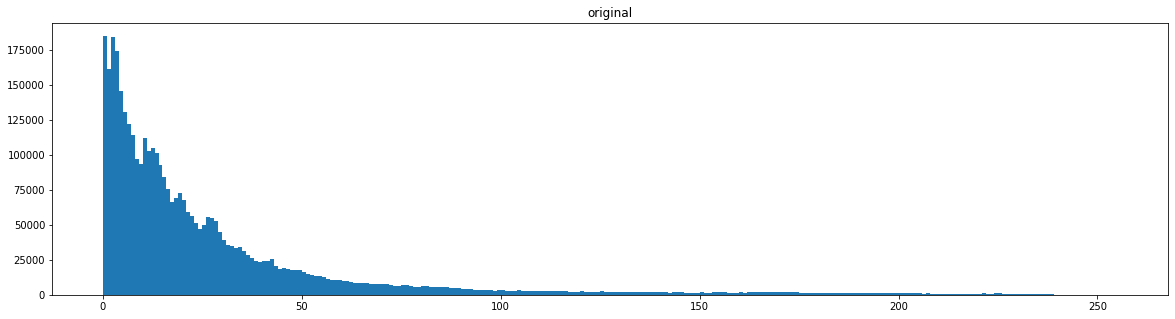

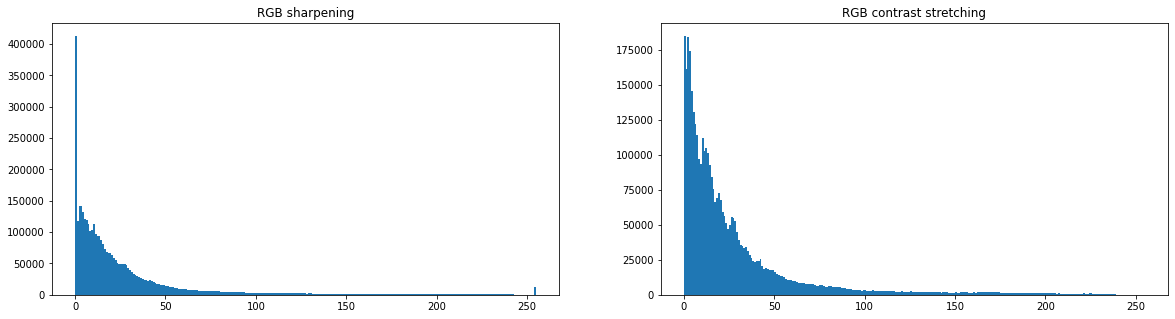

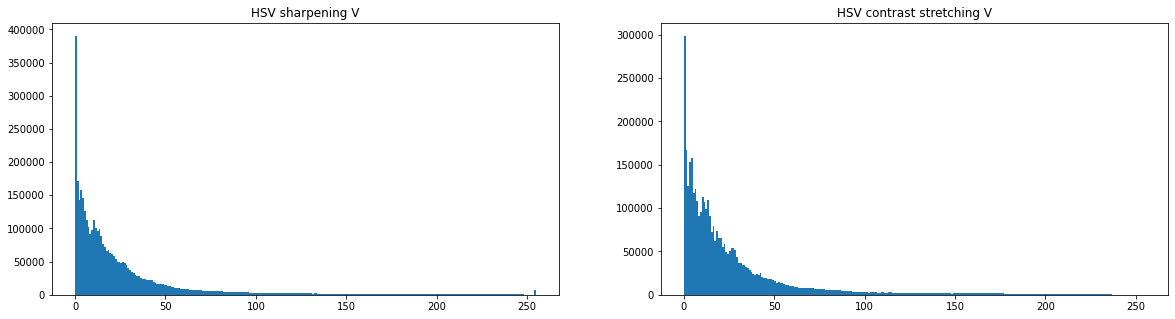

In [15]:
plt.figure(figsize=(20,5))
plt.hist(i2.flatten(), 255, range=(0,255));plt.title('original');
plt.show()


plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.hist(RGB_sharp.flatten(), 255, range=(0,255));plt.title('RGB sharpening');
plt.subplot(1,2,2);plt.hist(RGB_cs.flatten(), 255, range=(0,255));plt.title('RGB contrast stretching');
plt.show()


plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.hist(HSV_sharp.flatten(), 255, range=(0,255));plt.title('HSV sharpening V');
plt.subplot(1,2,2);plt.hist(HSV_cs.flatten(), 255, range=(0,255));plt.title('HSV contrast stretching V');
plt.show()


> Dari histogram tersebut terlihat perbedaan ketika melalukan sharpening terlihat bahwa terdapat nilai dengan ketajaman tertentu dibandingkan original sedangkan contrast stretching terlihat tampak lebih mirip dengan  asli. Pada citra dengan contrast stretching terlihat bahwa distribusinya masih terlihat mirip dengan citra asli hanya saja range level intensitas piksel yang tadinya terbatas menjadi memiliki range intensitas penuh.